## Lab 4: Choropleth mapping

This week we are going to talk about using Python to create choropleth map. We will map the blood lead distribution in Philadelphia. 

#### The color bar can be selected from: https://matplotlib.org/users/colormaps.html




### 1. Explore pandas and Geopandas dataframes
Import geopandas. Geopandas can read almost any vector-based spatial data format including ESRI shapefile using read_file command which returns a GeoDataframe object.

In [1]:
import geopandas as gpd

# read the blood lead data
blood_lead_shp = r'data/child_blood_lead_levels_by_ct.shp'
blood_lead_gdf = gpd.read_file(blood_lead_shp)

# print the first 5 records of the dataframe, used to check the data structure
blood_lead_gdf.head()


,census_tra,data_redac,num_bll_5p,num_screen,perc_5plus,geometry
0,42101000100,0,0.0,100.0,0.0,"POLYGON ((-75.14147213273969 39.9517072267047,..."
1,42101000200,1,NaN,109.0,NaN,"POLYGON ((-75.162377698504 39.9576545523082, -..."
2,42101000300,1,NaN,110.0,NaN,"POLYGON ((-75.17820482839041 39.9598134132842,..."
3,42101000401,1,NaN,61.0,NaN,"POLYGON ((-75.1729917788024 39.9546437050483, ..."
4,42101000402,0,0.0,41.0,0.0,"POLYGON ((-75.1633313650233 39.9533392100125, ..."


Descriptive analysis of the data

In [2]:

print(blood_lead_gdf['perc_5plus'].min()) # print the min value of the blood lead records for each neighborhood
print('The mas value is:', blood_lead_gdf['perc_5plus'].max()) # print the max value
print('The mean value is:', blood_lead_gdf['perc_5plus'].mean()) #print the mean value of all neighborhoods
print(blood_lead_gdf['perc_5plus'].describe()) # a general discription of the blood lead for all neighborhoods


0.0
The mas value is: 17.6
The mean value is: 5.8586614173228355
count    254.000000
mean       5.858661
std        3.939310
min        0.000000
25%        3.225000
50%        5.700000
75%        8.475000
max       17.600000
Name: perc_5plus, dtype: float64


In [3]:
blood_lead_gdf

,census_tra,data_redac,num_bll_5p,num_screen,perc_5plus,geometry
0,42101000100,0,0.0,100.0,0.0,"POLYGON ((-75.14147213273969 39.9517072267047,..."
1,42101000200,1,NaN,109.0,NaN,"POLYGON ((-75.162377698504 39.9576545523082, -..."
2,42101000300,1,NaN,110.0,NaN,"POLYGON ((-75.17820482839041 39.9598134132842,..."
3,42101000401,1,NaN,61.0,NaN,"POLYGON ((-75.1729917788024 39.9546437050483, ..."
4,42101000402,0,0.0,41.0,0.0,"POLYGON ((-75.1633313650233 39.9533392100125, ..."
...,...,...,...,...,...,...
375,42101980200,1,NaN,NaN,NaN,"POLYGON ((-75.05635673803801 40.0876645665025,..."
376,42101980700,1,NaN,NaN,NaN,"POLYGON ((-75.1351492487008 39.9286294339812, ..."
377,42101980800,1,NaN,NaN,NaN,"POLYGON ((-75.25592702256429 39.9781297321056,..."
378,42101980900,1,NaN,NaN,NaN,"POLYGON ((-75.2016453002315 39.937568298222, -..."


#### Create choropleth map
You can select the color bar from, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html.

If you have error of no mapclassify module, please just type in `pip install mapclassify` in your terminal.
If you have no pip installed, then you can run `conda install -c anaconda pip` in the anaconda terminal to install `pip`. 

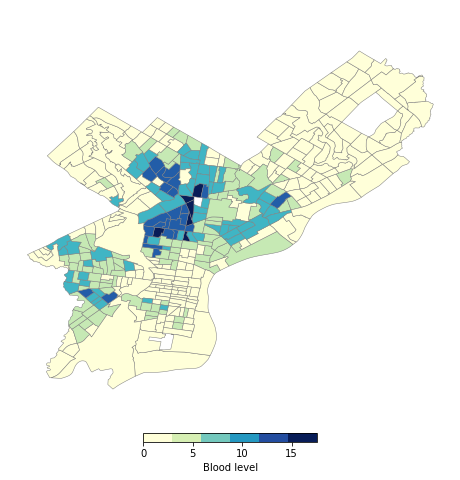

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm


fig, ax = plt.subplots(1, figsize=(8, 8))

# read the blood lead data
blood_lead_shp = r'data/child_blood_lead_levels_by_ct.shp'
blood_lead_gdf = gpd.read_file(blood_lead_shp)

# get the color bar, the string for color can be found here, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.cm.get_cmap('YlGnBu', 6)

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf.plot(column='perc_5plus', 
                         cmap='YlGnBu', 
                         edgecolor='0.5',
                         ax = ax,
                         linewidth=0.5,
                         scheme='equal_interval') # 'equal_interval', 'quantiles', 'fisher_jenks', 'fisher_jenks_sampled'

# create a color bar for the map
norm = Normalize(vmin=blood_lead_gdf['perc_5plus'].min(), vmax=blood_lead_gdf['perc_5plus'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
# n_cmap.set_array([])
cbar = ax.get_figure().colorbar(n_cmap, orientation='horizontal', fraction=0.02, pad=0.0, shrink=0.5)
cbar.ax.set_xlabel('Blood level')

ax.set_axis_off()
plt.axis('equal')
plt.show()


### Using Philadelphia local projection, https://spatialreference.org/ref/?search=Penn&srtext=Search, epsg code of 3651

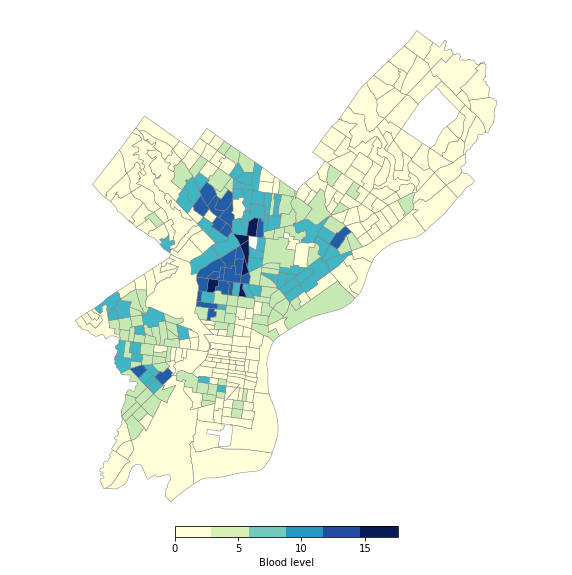

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import cartopy.crs as ccrs


f, ax = plt.subplots(1, figsize=(10, 10))

# read the blood lead data
blood_lead_shp = r'data/child_blood_lead_levels_by_ct.shp'
blood_lead_gdf = gpd.read_file(blood_lead_shp)

# change the projection to local projection of Philadelphia
blood_lead_gdf_phily = blood_lead_gdf.to_crs({'init': 'epsg:3651'})

cmap = plt.cm.get_cmap('YlGnBu', 6)

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_phily.plot(column='perc_5plus', 
                         cmap='YlGnBu', 
                         edgecolor='0.5',
                         ax = ax,
                         linewidth=0.5,
                         scheme='equal_interval')

# create a color bar for the map
norm = Normalize(vmin=blood_lead_gdf['perc_5plus'].min(), vmax=blood_lead_gdf['perc_5plus'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = ax.get_figure().colorbar(n_cmap, orientation='horizontal', fraction=0.046, pad=0.0, shrink=0.4)
cbar.ax.set_xlabel('Blood level')

ax.set_axis_off()
plt.axis('equal')
# plt.savefig('plot.png', bbox_inches='tight', pad_inches=0.1, dpi=1000)

plt.show()


### Create choropleth map with Null data marked. The strategy is to seperate the null data and valide data. Then map these two data frames to one plot

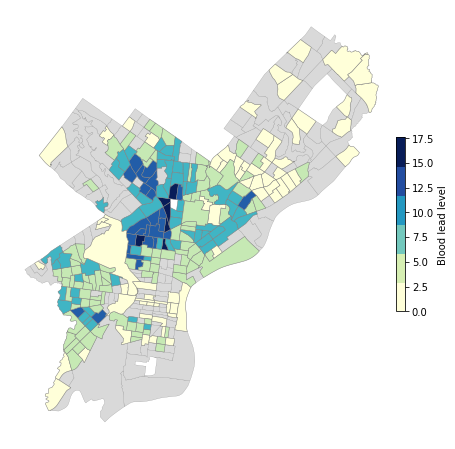

In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import matplotlib.patches as mpatches


# read the blood lead data
blood_lead_shp = r'data/child_blood_lead_levels_by_ct.shp'
blood_lead_gdf = gpd.read_file(blood_lead_shp)

# using the local projection of Phily, get the epsg code from https://spatialreference.org/ref/epsg/
blood_lead_gdf_phily = blood_lead_gdf.to_crs({'init': 'epsg:3651'})

# dataframe of neighborhoods with non-null values
blood_lead_gdf_valid = blood_lead_gdf_phily.dropna(how='any',axis=0) 

# dataframe of neighborhoods with null value
blood_lead_gdf_null = blood_lead_gdf_phily[blood_lead_gdf_phily.isnull().any(axis=1)] 

f, ax = plt.subplots(1, figsize=(8, 8))
cmap = plt.cm.get_cmap('YlGnBu', 6)

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_null.plot(column='perc_5plus', 
                         edgecolor='0.5',
                         color='#d9d9d9',
                         ax = ax,
                         linewidth=0.2)

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_valid.plot(column='perc_5plus', 
                         cmap='YlGnBu', 
                         edgecolor='0.5',
                         ax = ax,
                         linewidth=0.5,
                         scheme='equal_interval')

# create a color bar for the map
norm = Normalize(vmin=blood_lead_gdf_valid['perc_5plus'].min(), vmax=blood_lead_gdf_valid['perc_5plus'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)

cbar = ax.get_figure().colorbar(n_cmap, orientation='vertical', fraction=0.046, pad=0.0, shrink=0.4)

# cbar = ax.get_figure().colorbar(n_cmap, orientation='horizontal', fraction=0.046, pad=0.0, shrink=0.2)
cbar.ax.set_ylabel('Blood lead level')

ax.set_axis_off()
# plt.axis('equal')

# save the geoviz into a png file locally
plt.savefig("PhiladelphiaBloodLead.png", bbox_inches='tight', pad_inches=0.1, dpi=1000)

plt.show(f)


## Lab 4: Homework：
1. Using the same dataset (Blood lead distribution of Philadelphia), plot the map for the records of `num_bll_5p`. You can also make choropleth map for other datasets you can find. 

2. Using the other palettee you think is beautiful. Different from the one I used. You can find more palettee from https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

3. Save the plot as a png file with dpi of 200. Upload both png file and ipynb file to canvas.


## Reference:
1. Mapping using GeoPandas, https://geopandas.readthedocs.io/en/latest/mapping.html
2. Gallery of GeoPandas Mapping, https://geopandas.readthedocs.io/en/latest/gallery/index.html